# Prep

In [317]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from datetime import datetime
import yfinance as yf
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.api import MarkovAutoregression
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore")

In [49]:
start_date = "2019-01-08"
end_date = "2024-01-08"
NVDA = yf.download("NVDA", start=start_date, end=end_date, interval = "1d")


[*********************100%%**********************]  1 of 1 completed


In [50]:
nvda = NVDA["Adj Close"]
print(nvda.describe())
print(nvda.isnull().sum())

count    1258.000000
mean      178.664497
std       125.634508
min        32.644447
25%        70.534838
50%       146.692833
75%       232.801373
max       504.045685
Name: Adj Close, dtype: float64
0


In [51]:
nvda = nvda.reset_index()
nvda.columns = ["Date", "NVDA"]

In [52]:
nvda

,Date,NVDA
0,2019-01-08,34.685974
1,2019-01-09,35.368130
2,2019-01-10,36.025482
3,2019-01-11,36.918491
4,2019-01-14,37.317863
...,...,...
1253,2023-12-29,495.220001
1254,2024-01-02,481.679993
1255,2024-01-03,475.690002
1256,2024-01-04,479.980011


In [53]:
start_date = "2019-01-08"
end_date = "2024-01-08"
ticker = ["GC=F","DX-Y.NYB","^GSPC", "^TNX", "^VIX"]

In [54]:
for i in ticker:
    data = yf.download(i, start=start_date, end=end_date, interval = "1d").reset_index()[["Adj Close", "Date"]]
    data.columns = [i, "Date"]
    nvda = pd.merge(nvda, data, on="Date")
nvda

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,NVDA,GC=F,DX-Y.NYB,^GSPC,^TNX,^VIX
0,2019-01-08,34.685974,1283.199951,95.900002,2574.409912,2.716,20.469999
1,2019-01-09,35.368130,1289.300049,95.220001,2584.959961,2.728,19.980000
2,2019-01-10,36.025482,1284.699951,95.540001,2596.639893,2.731,19.500000
3,2019-01-11,36.918491,1287.099976,95.669998,2596.260010,2.701,18.190001
4,2019-01-14,37.317863,1289.099976,95.589996,2582.610107,2.710,19.070000
...,...,...,...,...,...,...,...
1253,2023-12-29,495.220001,2062.399902,101.330002,4769.830078,3.866,12.450000
1254,2024-01-02,481.679993,2064.399902,102.199997,4742.830078,3.946,13.200000
1255,2024-01-03,475.690002,2034.199951,102.459999,4704.810059,3.907,14.040000
1256,2024-01-04,479.980011,2042.300049,102.419998,4688.680176,3.991,14.130000


In [56]:
def get_day_of_week_from_timestamp(timestamp):
    return timestamp.day_name()


In [71]:
dow = []
for i in nvda["Date"]:
    dow.append(i.day_name())
dow

['Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monda

In [61]:
nvda["DOW"] = dow

In [68]:
nvda["MON"] = [1 if day == "Monday" else 0 for day in nvda["DOW"]]

In [ ]:
month = []
for i in nvda["Date"]:
    month.append(i.month_name())
month

In [73]:
nvda["MONTH"] = month

In [74]:
nvda["JAN"] = [1 if i=="January" else 0 for i in nvda["MONTH"]]

In [75]:
nvda

,Date,NVDA,GC=F,DX-Y.NYB,^GSPC,^TNX,^VIX,DOW,MON,MONTH,JAN
0,2019-01-08,34.685974,1283.199951,95.900002,2574.409912,2.716,20.469999,Tuesday,0,January,1
1,2019-01-09,35.368130,1289.300049,95.220001,2584.959961,2.728,19.980000,Wednesday,0,January,1
2,2019-01-10,36.025482,1284.699951,95.540001,2596.639893,2.731,19.500000,Thursday,0,January,1
3,2019-01-11,36.918491,1287.099976,95.669998,2596.260010,2.701,18.190001,Friday,0,January,1
4,2019-01-14,37.317863,1289.099976,95.589996,2582.610107,2.710,19.070000,Monday,1,January,1
...,...,...,...,...,...,...,...,...,...,...,...
1253,2023-12-29,495.220001,2062.399902,101.330002,4769.830078,3.866,12.450000,Friday,0,December,0
1254,2024-01-02,481.679993,2064.399902,102.199997,4742.830078,3.946,13.200000,Tuesday,0,January,1
1255,2024-01-03,475.690002,2034.199951,102.459999,4704.810059,3.907,14.040000,Wednesday,0,January,1
1256,2024-01-04,479.980011,2042.300049,102.419998,4688.680176,3.991,14.130000,Thursday,0,January,1


In [76]:
nvda["FEB"] = [1 if i=="February" else 0 for i in nvda["MONTH"]]
nvda["MAY"] = [1 if i=="May" else 0 for i in nvda["MONTH"]]
nvda["AUG"] = [1 if i=="August" else 0 for i in nvda["MONTH"]]
nvda["NOV"] = [1 if i=="November" else 0 for i in nvda["MONTH"]]
nvda["APR"] = [1 if i=="April" else 0 for i in nvda["MONTH"]]
nvda["MAR"] = [1 if i=="March" else 0 for i in nvda["MONTH"]]


In [78]:
for col in ["NVDA", "GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX"]:
    nvda[col] = nvda[col].pct_change()
nvda


,Date,NVDA,GC=F,DX-Y.NYB,^GSPC,^TNX,^VIX,DOW,MON,MONTH,JAN,FEB,MAY,AUG,NOV,APR,MAR
0,2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,0,January,1,0,0,0,0,0,0
1,2019-01-09,0.019667,0.004754,-0.007091,0.004098,0.004418,-0.023937,Wednesday,0,January,1,0,0,0,0,0,0
2,2019-01-10,0.018586,-0.003568,0.003361,0.004518,0.001100,-0.024024,Thursday,0,January,1,0,0,0,0,0,0
3,2019-01-11,0.024788,0.001868,0.001361,-0.000146,-0.010985,-0.067179,Friday,0,January,1,0,0,0,0,0,0
4,2019-01-14,0.010818,0.001554,-0.000836,-0.005258,0.003332,0.048378,Monday,1,January,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2023-12-29,0.000000,-0.005545,0.000988,-0.002826,0.004156,-0.001604,Friday,0,December,0,0,0,0,0,0,0
1254,2024-01-02,-0.027341,0.000970,0.008586,-0.005661,0.020693,0.060241,Tuesday,0,January,1,0,0,0,0,0,0
1255,2024-01-03,-0.012436,-0.014629,0.002544,-0.008016,-0.009883,0.063636,Wednesday,0,January,1,0,0,0,0,0,0
1256,2024-01-04,0.009018,0.003982,-0.000390,-0.003428,0.021500,0.006410,Thursday,0,January,1,0,0,0,0,0,0


In [79]:
nvda.dropna(inplace=True)

# dummy variable approach

In [325]:
dummy = sm.OLS(endog=nvda["NVDA"], exog=sm.add_constant(nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]]))


In [326]:
dummy_result = dummy.fit()
dummy_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NVDA   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     107.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.81e-192
Time:                        02:26:35   Log-Likelihood:                 2996.4
No. Observations:                1257   AIC:                            -5965.
Df Residuals:                    1243   BIC:                            -5893.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.170      0.865      -0.002       0.002
GC=F          -0.0287      0.072     -0.399      0.690      -0.170       0.113
DX-Y.NYB       0.0527      0.167      0.316      0.752      -0.275       0.380
^GSPC          1.6537      0.071     23.161      0.000       1.514       1.794
^TNX          -0.0962      0.018     -5.446      0.000      -0.131      -0.062
^VIX          -0.0392      0.011     -3.444      0.001      -0.062      -0.017
MON            0.0029      0.002      1.737      0.083      -0.000       0.006
JAN            0.0012      0.002      0.501      0.616      -0.004       0.006
FEB            0.0067      0.003      2.658      0.008       0.002       0.012
MAR            0.0033      0.002      1.430      0.153      -0.001       0.008
APR           -0.0040      0.002     -1.646      0.100      -0.009       0.001
MAY            0.0032      0.002      1.327      0.185      -0.002       0.008
AUG            0.0019      0.002      0.831      0.406      -0.003       0.007
NOV            0.0024      0.002      0.983      0.326      -0.002       0.007
==============================================================================
Omnibus:                      374.972   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5599.564
Skew:                           0.960   Prob(JB):                         0.00
Kurtosis:                      13.160   Cond. No.                         279.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
het_test = sms.het_breuschpagan(dummy_result.resid, dummy_result.model.exog)
het_test

(20.9803209300418, 0.0733187676191238, 1.6229850455047776, 0.07265038298042616)

<Axes: >

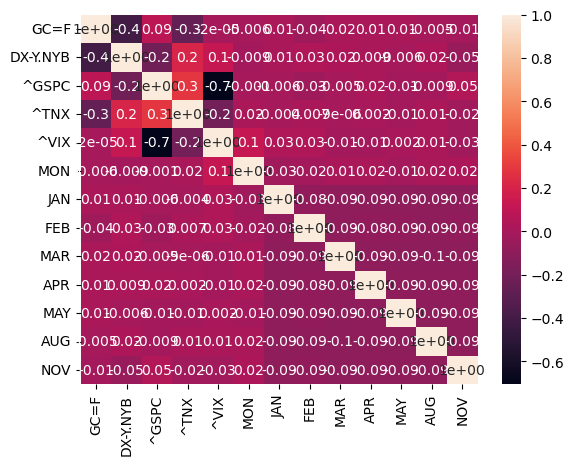

In [331]:
sns.heatmap(nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]].corr(), annot=True, fmt=".1")


# Markov Switching approach

In [91]:
order = arma_order_select_ic(y=nvda["NVDA"], max_ar=7, max_ma=7, trend="n")


In [92]:
order

{'bic':              0            1            2  ...            5            6            7
 0 -5032.955217 -5032.826000 -5026.458134  ... -5009.779279 -5003.144265 -5006.037215
 1 -5033.175305 -5026.911759 -5020.057284  ... -5011.627666 -5004.936696 -5004.612990
 2 -5026.792496 -5020.046620 -5024.269017  ... -5004.172624 -4997.941220 -4997.952261
 3 -5021.081433 -5013.971263 -5007.504292  ... -5014.777568 -5011.127799 -5000.152462
 4 -5014.101951 -5006.901146 -5000.465821  ... -4985.449760 -5003.605903 -4995.964275
 5 -5010.901279 -5003.620910 -5009.232622  ... -4996.627495 -4980.657245 -4990.498387
 6 -5004.967018 -5010.217735 -5002.632769  ... -4989.252116 -4973.940946 -4987.507738
 7 -5010.220071 -5009.956493 -5002.438653  ... -4978.148842 -4980.677996 -4979.228561
 
 [8 rows x 8 columns],
 'bic_min_order': (1, 0)}

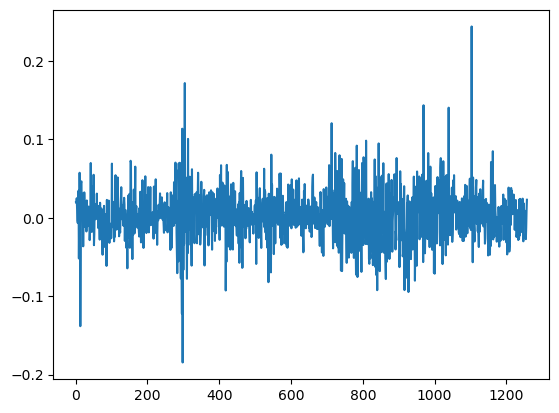

In [88]:
plt.plot(nvda["NVDA"])

In [94]:
markov = MarkovAutoregression(endog=nvda["NVDA"], k_regimes=2, order=1, exog=nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]], exog_tvtp=nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]], switching_ar=True, switching_trend=True, switching_exog=True, switching_variance=True)


In [95]:
markov_result = markov.fit()

In [97]:
markov_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     NVDA   No. Observations:                 1256
Model:             MarkovAutoregression   Log Likelihood                3071.281
Date:                  Tue, 09 Jan 2024   AIC                          -6026.562
Time:                          23:00:12   BIC                          -5728.693
Sample:                               0   HQIC                         -5914.610
                                 - 1256                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.687      0.492      -0.003       0.001
x1             0.1449      0.095      1.525      0.127      -0.041       0.331
x2             0.3480      0.061      5.736      0.000       0.229       0.467
x3             1.3164      0.049     26.935      0.000       1.221       1.412
x4             0.0159      0.012      1.361      0.174      -0.007       0.039
x5            -0.0303      0.008     -3.675      0.000      -0.047      -0.014
x6             0.0004      0.002      0.208      0.835      -0.004       0.005
x7             0.0062      0.002      3.156      0.002       0.002       0.010
x8            -0.0006      0.003     -0.196      0.845      -0.007       0.006
x9            -0.0043      0.002     -1.964      0.049      -0.009    -9.7e-06
x10           -0.0007      0.002     -0.283      0.777      -0.005       0.004
x11           -0.0035      0.003     -1.120      0.263      -0.010       0.003
x12           -0.0009      0.003     -0.321      0.748      -0.006       0.005
x13            0.0072      0.004      1.876      0.061      -0.000       0.015
sigma2         0.0002   1.42e-05     12.462      0.000       0.000       0.000
ar.L1         -0.0561        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.618      0.536      -0.002       0.005
x1            -0.2300      0.122     -1.885      0.059      -0.469       0.009
x2            -0.2558      0.223     -1.149      0.250      -0.692       0.180
x3             2.0130      0.129     15.607      0.000       1.760       2.266
x4            -0.2351      0.038     -6.240      0.000      -0.309      -0.161
x5            -0.0513      0.014     -3.784      0.000      -0.078      -0.025
x6             0.0055      0.003      1.813      0.070      -0.000       0.012
x7            -0.0024      0.004     -0.574      0.566      -0.011       0.006
x8             0.0109      0.003      3.426      0.001       0.005       0.017
x9             0.0117      0.005      2.289      0.022       0.002       0.022
x10           -0.0066      0.004     -1.557      0.119      -0.015       0.002
x11            0.0074      0.003      2.535      0.011       0.002       0.013
x12            0.0045      0.004      0.995      0.320      -0.004       0.013
x13           -0.0015      0.004     -0.372      0.710      -0.009       0.006
sigma2         0.0007   4.57e-05     15.241      0.000       0.001       0.001
ar.L1         -0.0139      0.043     -0.323      0.746      -0.098       0.071
                           Regime transition parameters        

In [101]:
filtered_prob = markov_result.filtered_marginal_probabilities

In [102]:
smoothed_prob = markov_result.smoothed_marginal_probabilities

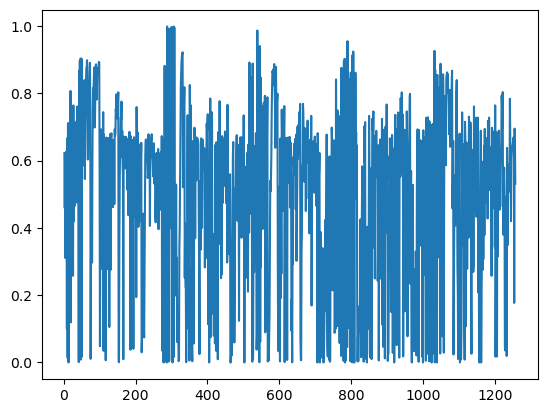

In [105]:
plt.plot(filtered_prob[0])

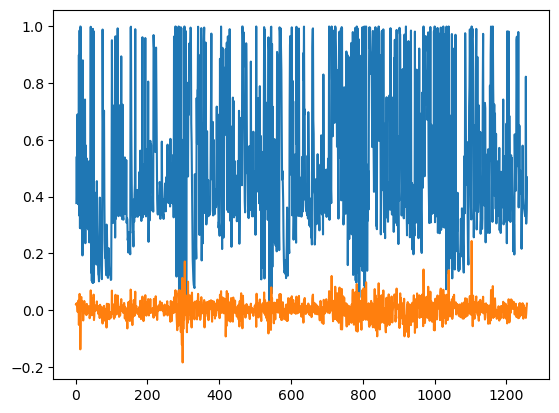

In [110]:
plt.plot(filtered_prob[1])
plt.plot(nvda["NVDA"])

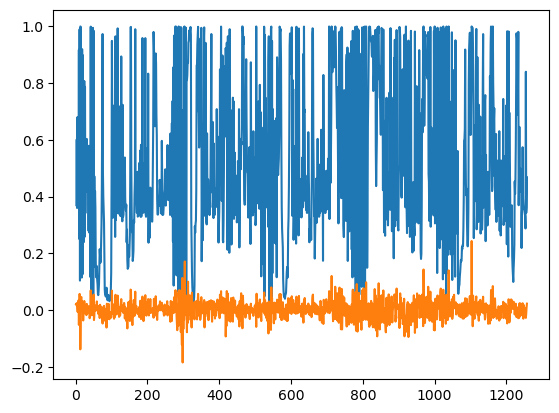

In [114]:
plt.plot(smoothed_prob[1])
plt.plot(nvda["NVDA"])

In [124]:
markov_result.expected_durations.describe()

,0,1
count,1256.000000,1256.000000
mean,3.407466,4.095508
std,3.098539,3.972206
min,1.048536,1.078433
25%,1.620675,1.441464
50%,1.999169,2.012213
75%,4.128112,5.034323
max,14.179272,14.580036


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

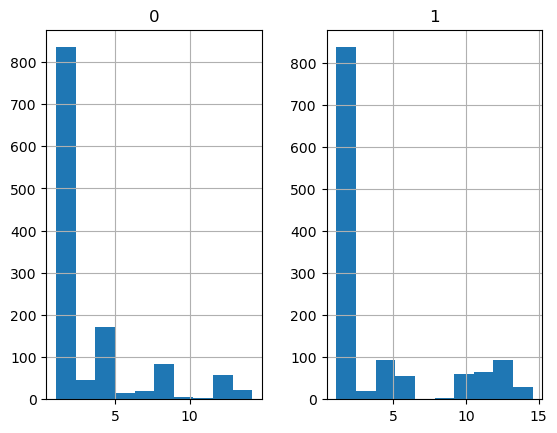

In [125]:
markov_result.expected_durations.hist()

# comparison

In [304]:
dummy_pred = dummy_result.predict()
markov_pred = markov_result.predict()
markov_pred

2       0.010792
3       0.005077
4      -0.005984
5       0.020626
6       0.004280
          ...   
1253   -0.004863
1254   -0.019541
1255   -0.010663
1256   -0.004248
1257    0.005645
Length: 1256, dtype: float64

In [305]:
abs(dummy_pred - nvda["NVDA"]).mean()

0.0162376082208911

In [306]:
abs(markov_pred - nvda["NVDA"]).mean()

0.014318889816588885

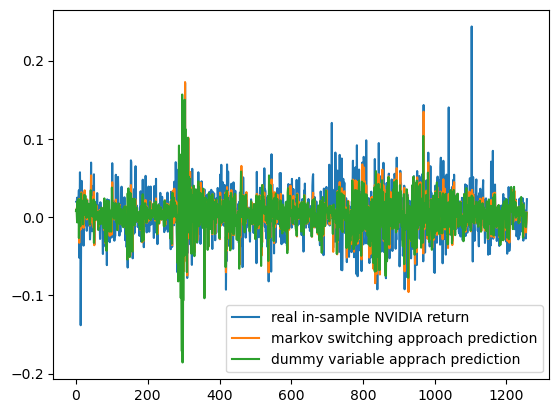

In [355]:
plt.plot(nvda["NVDA"], label="real in-sample NVIDIA return")
plt.plot(markov_pred, label="markov switching approach prediction")
plt.plot(dummy_pred, label="dummy variable apprach prediction")
plt.legend()

Text(0.5, 1.0, 'histogram of real NVIDIA return')

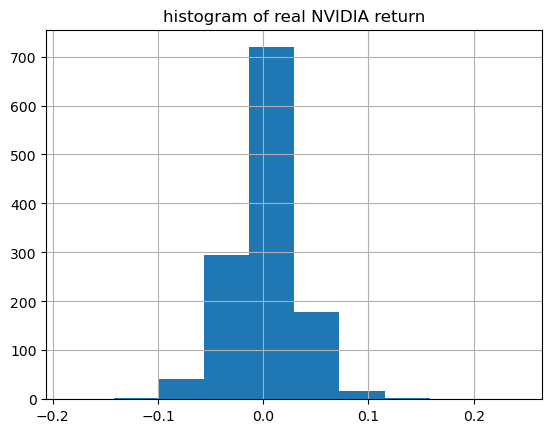

In [332]:
nvda["NVDA"].hist()
plt.title("histogram of real NVIDIA return")

Text(0.5, 1.0, 'histogram of return prediction by markov switching')

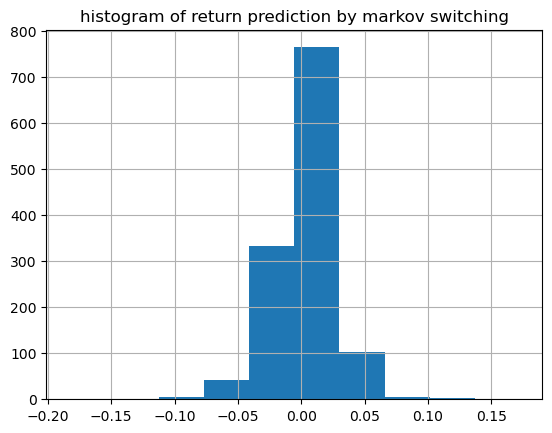

In [333]:
markov_pred.hist()
plt.title("histogram of return prediction by markov switching")

Text(0.5, 1.0, 'histogram of return prediction by dummy variable')

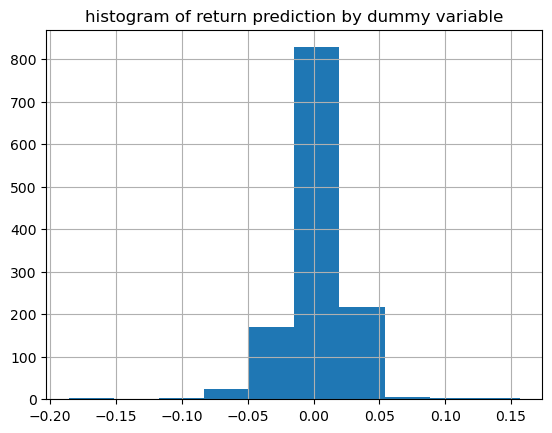

In [334]:
pd.DataFrame(dummy_pred).hist()
plt.title("histogram of return prediction by dummy variable")

In [311]:
nvda["NVDA"].describe()

count    1257.000000
mean        0.002635
std         0.032496
min        -0.184521
25%        -0.015152
50%         0.003054
75%         0.019754
max         0.243696
Name: NVDA, dtype: float64

In [346]:
df = pd.DataFrame()
df["NVDA"]= np.array(nvda["NVDA"])
df["markov"] = markov_pred
df["dummy"] = dummy_pred
highquantile = df[(df["NVDA"]>=0.05)].dropna()
lowquantile = df[(df["NVDA"]<=-0.05)].dropna()

Text(0.5, 1.0, 'comparison in upper tail')

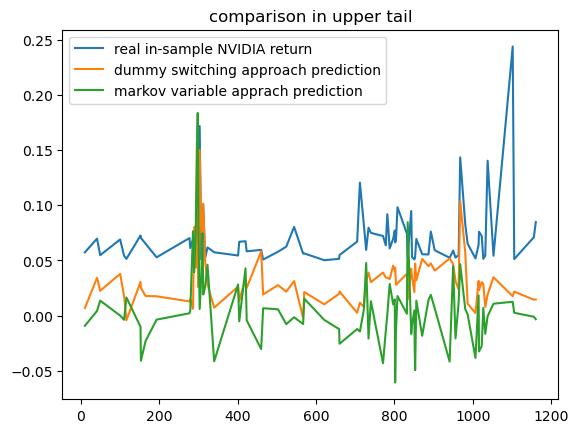

In [347]:
plt.plot(highquantile["NVDA"], label="real in-sample NVIDIA return")
plt.plot(highquantile["dummy"], label="dummy switching approach prediction")
plt.plot(-highquantile["markov"], label="markov variable apprach prediction")
plt.legend()
plt.title("comparison in upper tail")

Text(0.5, 1.0, 'comparison in lower tail')

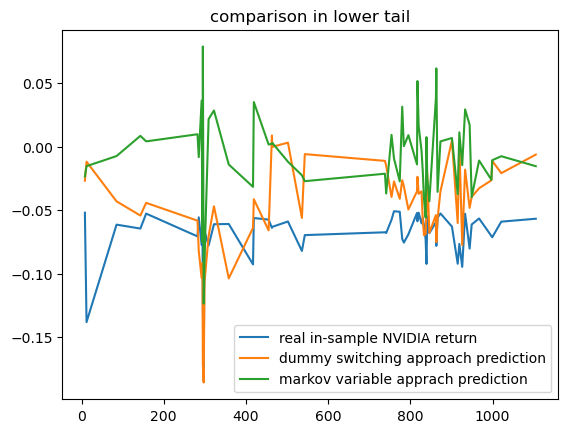

In [353]:
plt.plot(lowquantile["NVDA"], label="real in-sample NVIDIA return")
plt.plot(lowquantile["dummy"], label="dummy switching approach prediction")
plt.plot(-lowquantile["markov"], label="markov variable apprach prediction")
plt.legend()
plt.title("comparison in lower tail")

# attempting reduction of insignificant variables

In [116]:
markov_reduced = MarkovAutoregression(endog=nvda["NVDA"], k_regimes=2, order=1, exog=nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "MAY", "NOV"]], exog_tvtp=nvda[["MAR", "APR", "AUG"]], switching_ar=True, switching_trend=True, switching_exog=True, switching_variance=True)
markov_reduced_result = markov_reduced.fit()
markov_reduced_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     NVDA   No. Observations:                 1256
Model:             MarkovAutoregression   Log Likelihood                3062.885
Date:                  Wed, 10 Jan 2024   AIC                          -6057.770
Time:                          00:40:43   BIC                          -5883.156
Sample:                               0   HQIC                         -5992.142
                                 - 1256                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.803      0.422      -0.003       0.001
x1             0.1218      0.108      1.129      0.259      -0.090       0.333
x2             0.0641      0.301      0.213      0.831      -0.525       0.653
x3             1.3245      0.087     15.198      0.000       1.154       1.495
x4             0.0188      0.021      0.894      0.371      -0.022       0.060
x5            -0.0308      0.016     -1.963      0.050      -0.062   -4.98e-05
x6             0.0006      0.002      0.286      0.775      -0.004       0.005
x7             0.0038      0.003      1.139      0.255      -0.003       0.010
x8            -0.0002      0.003     -0.061      0.951      -0.006       0.006
x9            -0.0038      0.002     -1.525      0.127      -0.009       0.001
x10           -0.0048      0.003     -1.391      0.164      -0.012       0.002
x11            0.0053      0.004      1.381      0.167      -0.002       0.013
sigma2         0.0002   1.61e-05     11.283      0.000       0.000       0.000
ar.L1         -0.0584      0.052     -1.125      0.261      -0.160       0.043
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.002      0.378      0.705      -0.003       0.004
x1            -0.2097      0.141     -1.487      0.137      -0.486       0.067
x2             0.0717      0.364      0.197      0.844      -0.641       0.785
x3             2.0635      0.144     14.288      0.000       1.780       2.347
x4            -0.2430      0.041     -5.904      0.000      -0.324      -0.162
x5            -0.0469      0.025     -1.855      0.064      -0.096       0.003
x6             0.0061      0.003      1.810      0.070      -0.001       0.013
x7            -0.0003      0.005     -0.067      0.946      -0.010       0.009
x8             0.0126      0.005      2.607      0.009       0.003       0.022
x9             0.0129      0.005      2.387      0.017       0.002       0.023
x10            0.0109      0.005      2.106      0.035       0.001       0.021
x11           -0.0008      0.005     -0.161      0.872      -0.011       0.009
sigma2         0.0007   4.95e-05     14.577      0.000       0.001       0.001
ar.L1          0.0103      0.060      0.171      0.864      -0.107       0.128
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0    -0.0030      0.673     -0.004     

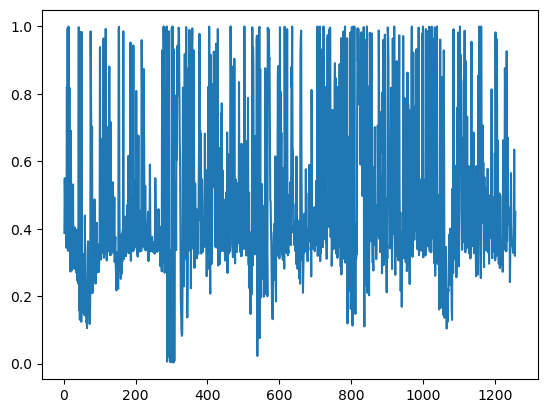

In [117]:
plt.plot(markov_reduced_result.filtered_marginal_probabilities[1])

# logit

In [415]:
from statsmodels.discrete.discrete_model import Logit, Probit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit
def evaluate_model(df, target_column_name, fitted_model, y_test, X_test):
    threshold_ratio = df[target_column_name].mean()
    y_pred_prob = fitted_model.predict(X_test)
    y_pred = np.where(y_pred_prob > threshold_ratio, 1, 0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nROC AUC score:", roc_auc) 
    print("\nAccuracy Score:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [383]:
nvda

,Date,NVDA,GC=F,DX-Y.NYB,^GSPC,^TNX,^VIX,DOW,MON,MONTH,JAN,FEB,MAY,AUG,NOV,APR,MAR,NVDA_sign,NVDA_tail5,NVDA_tail10,NVDA_tail15,NVDA_downsidetail
1,2019-01-09,0.019667,0.004754,-0.007091,0.004098,0.004418,-0.023937,Wednesday,0,January,1,0,0,0,0,0,0,1,0,0,0,0
2,2019-01-10,0.018586,-0.003568,0.003361,0.004518,0.001100,-0.024024,Thursday,0,January,1,0,0,0,0,0,0,1,0,0,0,0
3,2019-01-11,0.024788,0.001868,0.001361,-0.000146,-0.010985,-0.067179,Friday,0,January,1,0,0,0,0,0,0,1,0,0,0,0
4,2019-01-14,0.010818,0.001554,-0.000836,-0.005258,0.003332,0.048378,Monday,1,January,1,0,0,0,0,0,0,1,0,0,0,0
5,2019-01-15,-0.003789,-0.002250,0.003975,0.010722,0.000369,-0.024646,Tuesday,0,January,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2023-12-29,0.000000,-0.005545,0.000988,-0.002826,0.004156,-0.001604,Friday,0,December,0,0,0,0,0,0,0,0,0,0,0,0
1254,2024-01-02,-0.027341,0.000970,0.008586,-0.005661,0.020693,0.060241,Tuesday,0,January,1,0,0,0,0,0,0,0,0,0,0,0
1255,2024-01-03,-0.012436,-0.014629,0.002544,-0.008016,-0.009883,0.063636,Wednesday,0,January,1,0,0,0,0,0,0,0,0,0,0,0
1256,2024-01-04,0.009018,0.003982,-0.000390,-0.003428,0.021500,0.006410,Thursday,0,January,1,0,0,0,0,0,0,1,0,0,0,0


In [360]:
nvda["NVDA_sign"] = [1 if i>0 else 0 for i in nvda["NVDA"]]

In [381]:
nvda["NVDA_tail5"] = [1 if (i>=nvda["NVDA"].quantile(0.95))|(i<=nvda["NVDA"].quantile(0.05)) else 0 for i in nvda["NVDA"]]
nvda["NVDA_tail10"] = [1 if (i>=nvda["NVDA"].quantile(0.9))|(i<=nvda["NVDA"].quantile(0.1)) else 0 for i in nvda["NVDA"]]
nvda["NVDA_tail15"] = [1 if (i>=nvda["NVDA"].quantile(0.85))|(i<=nvda["NVDA"].quantile(0.15)) else 0 for i in nvda["NVDA"]]
nvda["NVDA_downsidetail"] = [1 if (i<=nvda["NVDA"].quantile(0.1)) else 0 for i in nvda["NVDA"]]



In [382]:
nvda["NVDA_downsidetail"].value_counts()

NVDA_downsidetail
0    1131
1     126
Name: count, dtype: int64

In [408]:
sign_X = nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]] 
sign_y = nvda['NVDA_sign']    
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(sign_X, sign_y):
    sign_X_train, sign_X_test = sign_X.iloc[train_index], sign_X.iloc[test_index]
    sign_y_train, sign_y_test = sign_y.iloc[train_index], sign_y.iloc[test_index]

In [410]:
signlogit_model = Logit(endog=sign_y_train, exog=sign_X_train)
signlogit_result = signlogit_model.fit()
signlogit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.485087
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:              NVDA_sign
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           0.4317      1.663      0.260      0.795      -2.828       3.691
DX-Y.NYB       1.5583      3.749      0.416      0.678      -5.790       8.907
^GSPC         27.0380      2.211     12.230      0.000      22.705      31.371
^TNX          -1.0138      0.466     -2.177      0.029      -1.927      -0.101
^VIX          -0.3796      0.316     -1.202      0.229      -0.999       0.239
MON            0.0717      0.032      2.222      0.026       0.008       0.135
JAN            0.0553      0.045      1.243      0.214      -0.032       0.143
FEB            0.0914      0.046      1.986      0.047       0.001       0.182
MAR            0.0036      0.050      0.072      0.942      -0.095       0.102
APR           -0.0715      0.045     -1.599      0.110      -0.159       0.016
MAY           -0.0282      0.045     -0.623      0.534      -0.117       0.060
AUG           -0.0113      0.044     -0.259      0.796      -0.097       0.074
NOV            0.0216      0.044      0.489      0.625      -0.065       0.108
==============================================================================
"""

Confusion Matrix:
[[ 82  33]
 [ 33 104]]

ROC AUC score: 0.8042526182164392

Accuracy Score: 0.7380952380952381
Precision: 0.7591240875912408
Recall: 0.7591240875912408
F1 Score: 0.7591240875912408


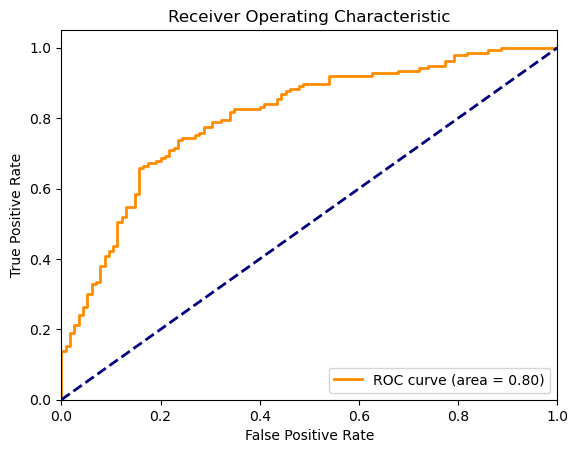

In [416]:
evaluate_model(nvda, "NVDA_sign", signlogit_result, sign_y_test, sign_X_test)


In [411]:
signprobit_model = Probit(endog=sign_y_train, exog=sign_X_train)
signprobit_result = signprobit_model.fit()
signprobit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.484842
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:              NVDA_sign
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           0.4314      1.613      0.267      0.789      -2.730       3.593
DX-Y.NYB       1.5668      3.677      0.426      0.670      -5.641       8.774
^GSPC         26.4498      2.086     12.683      0.000      22.362      30.537
^TNX          -1.0468      0.453     -2.309      0.021      -1.935      -0.158
^VIX          -0.4321      0.305     -1.419      0.156      -1.029       0.165
MON            0.0708      0.032      2.215      0.027       0.008       0.134
JAN            0.0570      0.045      1.270      0.204      -0.031       0.145
FEB            0.0957      0.046      2.060      0.039       0.005       0.187
MAR            0.0072      0.049      0.149      0.882      -0.088       0.103
APR           -0.0819      0.045     -1.821      0.069      -0.170       0.006
MAY           -0.0293      0.045     -0.651      0.515      -0.117       0.059
AUG           -0.0035      0.044     -0.080      0.936      -0.089       0.082
NOV            0.0251      0.044      0.569      0.570      -0.061       0.112
==============================================================================
"""

Confusion Matrix:
[[ 83  32]
 [ 33 104]]

ROC AUC score: 0.8042526182164393

Accuracy Score: 0.7420634920634921
Precision: 0.7647058823529411
Recall: 0.7591240875912408
F1 Score: 0.7619047619047619


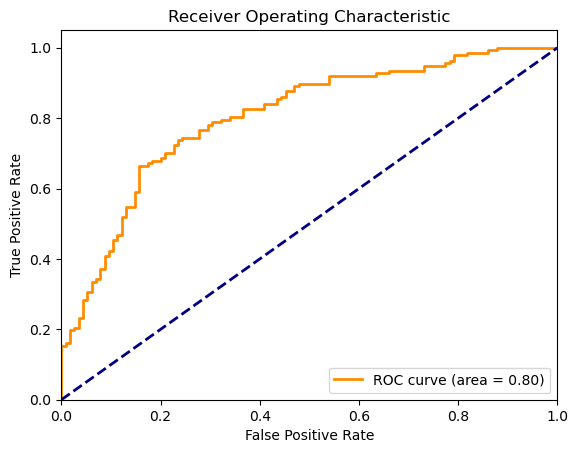

In [417]:
evaluate_model(nvda, "NVDA_sign", signprobit_result, sign_y_test, sign_X_test)


In [418]:
tail5_X = nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]] 
tail5_y = nvda['NVDA_tail5']    
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(tail5_X, tail5_y):
    tail5_X_train, tail5_X_test = tail5_X.iloc[train_index], tail5_X.iloc[test_index]
    tail5_y_train, tail5_y_test = tail5_y.iloc[train_index], tail5_y.iloc[test_index]

In [419]:
tail5logit_model = Logit(endog=tail5_y_train, exog=tail5_X_train)
tail5logit_result = tail5logit_model.fit()
tail5logit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.490000
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             NVDA_tail5
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F          -0.1570      1.458     -0.108      0.914      -3.015       2.701
DX-Y.NYB      -2.5539      3.309     -0.772      0.440      -9.039       3.931
^GSPC          0.9605      1.374      0.699      0.485      -1.733       3.654
^TNX           0.4311      0.368      1.172      0.241      -0.290       1.152
^VIX           0.6341      0.212      2.986      0.003       0.218       1.050
MON           -0.1935      0.036     -5.398      0.000      -0.264      -0.123
JAN           -0.3254      0.055     -5.877      0.000      -0.434      -0.217
FEB           -0.2317      0.045     -5.137      0.000      -0.320      -0.143
MAR           -0.2214      0.043     -5.113      0.000      -0.306      -0.137
APR           -0.3080      0.055     -5.605      0.000      -0.416      -0.200
MAY           -0.3632      0.057     -6.389      0.000      -0.475      -0.252
AUG           -0.2931      0.050     -5.884      0.000      -0.391      -0.195
NOV           -0.3172      0.055     -5.750      0.000      -0.425      -0.209
==============================================================================
"""

Confusion Matrix:
[[ 43 184]
 [  7  18]]

ROC AUC score: 0.4738325991189427

Accuracy Score: 0.24206349206349206
Precision: 0.0891089108910891
Recall: 0.72
F1 Score: 0.15859030837004406


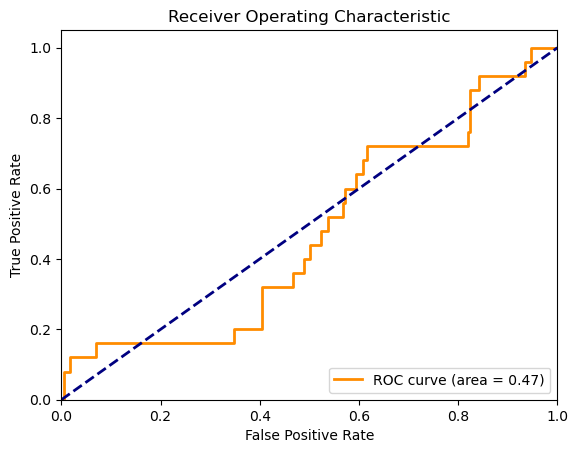

In [420]:
evaluate_model(nvda, "NVDA_tail5", tail5logit_result, tail5_y_test, tail5_X_test)


In [421]:
tail5probit_model = Probit(endog=tail5_y_train, exog=tail5_X_train)
tail5probit_result = tail5probit_model.fit()
tail5probit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.493277
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:             NVDA_tail5
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F          -0.0954      1.378     -0.069      0.945      -2.797       2.606
DX-Y.NYB      -2.5923      3.256     -0.796      0.426      -8.975       3.790
^GSPC          1.0423      1.266      0.823      0.410      -1.440       3.524
^TNX           0.4130      0.347      1.191      0.234      -0.266       1.093
^VIX           0.6283      0.210      2.996      0.003       0.217       1.039
MON           -0.1652      0.034     -4.869      0.000      -0.232      -0.099
JAN           -0.3229      0.049     -6.535      0.000      -0.420      -0.226
FEB           -0.2451      0.044     -5.512      0.000      -0.332      -0.158
MAR           -0.2299      0.042     -5.437      0.000      -0.313      -0.147
APR           -0.3201      0.051     -6.305      0.000      -0.420      -0.221
MAY           -0.3687      0.050     -7.406      0.000      -0.466      -0.271
AUG           -0.2878      0.045     -6.343      0.000      -0.377      -0.199
NOV           -0.3169      0.049     -6.444      0.000      -0.413      -0.221
==============================================================================
"""

Confusion Matrix:
[[ 44 183]
 [  5  20]]

ROC AUC score: 0.4711894273127754

Accuracy Score: 0.25396825396825395
Precision: 0.09852216748768473
Recall: 0.8
F1 Score: 0.1754385964912281


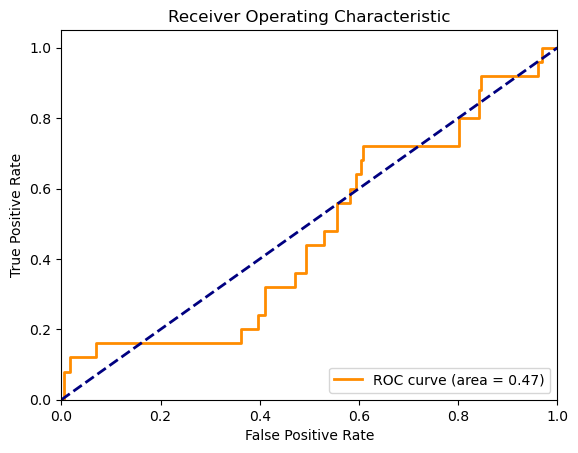

In [422]:
evaluate_model(nvda, "NVDA_tail5", tail5probit_result, tail5_y_test, tail5_X_test)


In [423]:
tail10_X = nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]] 
tail10_y = nvda['NVDA_tail10']    
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(tail10_X, tail10_y):
    tail10_X_train, tail10_X_test = tail10_X.iloc[train_index], tail10_X.iloc[test_index]
    tail10_y_train, tail10_y_test = tail10_y.iloc[train_index], tail10_y.iloc[test_index]

In [424]:
tail10logit_model = Logit(endog=tail10_y_train, exog=tail10_X_train)
tail10logit_result = tail10logit_model.fit()
tail10logit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.580360
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            NVDA_tail10
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           0.5352      1.650      0.324      0.746      -2.699       3.769
DX-Y.NYB      -0.3393      3.641     -0.093      0.926      -7.476       6.797
^GSPC          2.6807      1.584      1.693      0.091      -0.423       5.785
^TNX           0.1740      0.389      0.447      0.655      -0.588       0.936
^VIX           1.1909      0.264      4.519      0.000       0.674       1.707
MON           -0.1848      0.038     -4.884      0.000      -0.259      -0.111
JAN           -0.2149      0.050     -4.316      0.000      -0.313      -0.117
FEB           -0.1822      0.051     -3.556      0.000      -0.283      -0.082
MAR           -0.1524      0.049     -3.117      0.002      -0.248      -0.057
APR           -0.2380      0.053     -4.460      0.000      -0.343      -0.133
MAY           -0.2340      0.054     -4.365      0.000      -0.339      -0.129
AUG           -0.2071      0.046     -4.474      0.000      -0.298      -0.116
NOV           -0.3070      0.058     -5.286      0.000      -0.421      -0.193
==============================================================================
"""

Confusion Matrix:
[[ 37 164]
 [  6  45]]

ROC AUC score: 0.53185055116574

Accuracy Score: 0.3253968253968254
Precision: 0.215311004784689
Recall: 0.8823529411764706
F1 Score: 0.3461538461538462


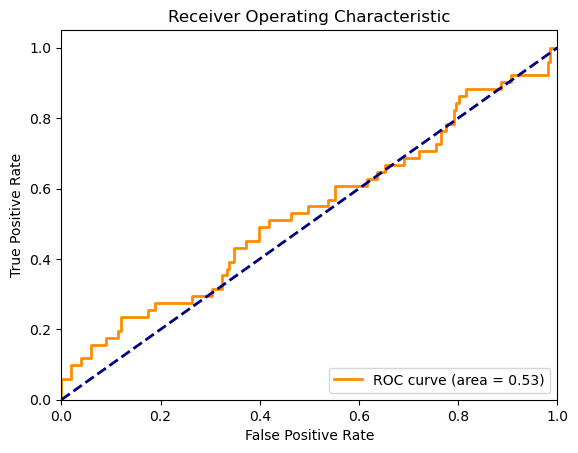

In [426]:
evaluate_model(nvda, "NVDA_tail10", tail10logit_result, tail10_y_test, tail10_X_test)


In [425]:
tail10probit_model = Probit(endog=tail10_y_train, exog=tail10_X_train)
tail10probit_result = tail10probit_model.fit()
tail10probit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.582014
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:            NVDA_tail10
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           0.6310      1.643      0.384      0.701      -2.590       3.852
DX-Y.NYB       0.0178      3.563      0.005      0.996      -6.965       7.000
^GSPC          2.6765      1.534      1.745      0.081      -0.329       5.682
^TNX           0.1210      0.383      0.316      0.752      -0.629       0.871
^VIX           1.1407      0.261      4.367      0.000       0.629       1.653
MON           -0.1723      0.036     -4.727      0.000      -0.244      -0.101
JAN           -0.2174      0.049     -4.447      0.000      -0.313      -0.122
FEB           -0.1867      0.051     -3.673      0.000      -0.286      -0.087
MAR           -0.1568      0.049     -3.192      0.001      -0.253      -0.061
APR           -0.2442      0.052     -4.738      0.000      -0.345      -0.143
MAY           -0.2344      0.052     -4.544      0.000      -0.336      -0.133
AUG           -0.2058      0.045     -4.533      0.000      -0.295      -0.117
NOV           -0.3028      0.053     -5.662      0.000      -0.408      -0.198
==============================================================================
"""

Confusion Matrix:
[[ 34 167]
 [  6  45]]

ROC AUC score: 0.526387669495659

Accuracy Score: 0.3134920634920635
Precision: 0.21226415094339623
Recall: 0.8823529411764706
F1 Score: 0.34220532319391633


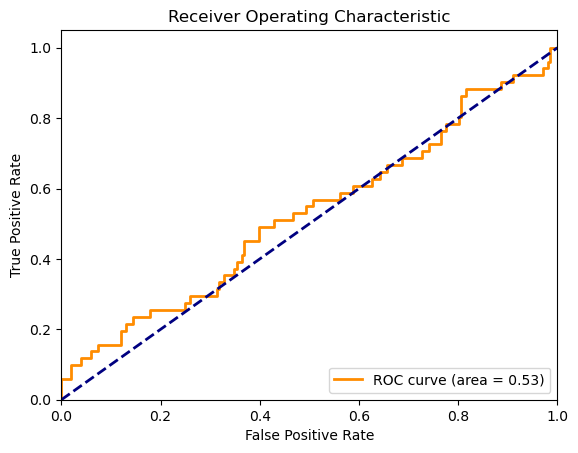

In [428]:
evaluate_model(nvda, "NVDA_tail10", tail10probit_result, tail10_y_test, tail10_X_test)


In [429]:
tail15_X = nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]] 
tail15_y = nvda['NVDA_tail15']    
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(tail15_X, tail15_y):
    tail15_X_train, tail15_X_test = tail15_X.iloc[train_index], tail15_X.iloc[test_index]
    tail15_y_train, tail15_y_test = tail15_y.iloc[train_index], tail15_y.iloc[test_index]

In [430]:
tail15logit_model = Logit(endog=tail15_y_train, exog=tail15_X_train)
tail15logit_result = tail15logit_model.fit()
tail15logit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.639691
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            NVDA_tail15
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F          -1.1539      1.745     -0.661      0.508      -4.573       2.266
DX-Y.NYB      -1.4574      3.972     -0.367      0.714      -9.242       6.328
^GSPC          0.6806      1.867      0.364      0.715      -2.979       4.340
^TNX           0.0703      0.420      0.167      0.867      -0.752       0.893
^VIX           1.3728      0.290      4.736      0.000       0.805       1.941
MON           -0.1320      0.038     -3.432      0.001      -0.207      -0.057
JAN           -0.1276      0.056     -2.290      0.022      -0.237      -0.018
FEB           -0.0285      0.056     -0.510      0.610      -0.138       0.081
MAR           -0.0932      0.055     -1.708      0.088      -0.200       0.014
APR           -0.1512      0.053     -2.863      0.004      -0.255      -0.048
MAY           -0.0748      0.051     -1.466      0.143      -0.175       0.025
AUG           -0.1925      0.051     -3.788      0.000      -0.292      -0.093
NOV           -0.1722      0.052     -3.302      0.001      -0.274      -0.070
==============================================================================
"""

Confusion Matrix:
[[ 37 139]
 [ 18  58]]

ROC AUC score: 0.525642942583732

Accuracy Score: 0.376984126984127
Precision: 0.29441624365482233
Recall: 0.7631578947368421
F1 Score: 0.42490842490842484


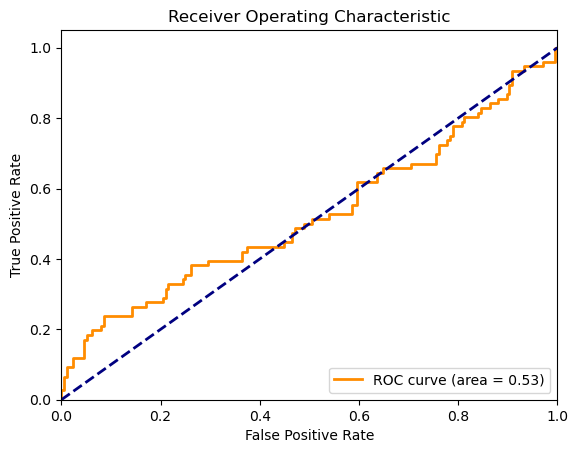

In [431]:
evaluate_model(nvda, "NVDA_tail15", tail15logit_result, tail15_y_test, tail15_X_test)



In [432]:
tail15probit_model = Probit(endog=tail15_y_train, exog=tail15_X_train)
tail15probit_result = tail15probit_model.fit()
tail15probit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.640466
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:            NVDA_tail15
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F          -0.9748      1.721     -0.566      0.571      -4.348       2.399
DX-Y.NYB      -1.2226      3.904     -0.313      0.754      -8.874       6.429
^GSPC          0.7321      1.790      0.409      0.683      -2.776       4.240
^TNX           0.0228      0.402      0.057      0.955      -0.765       0.811
^VIX           1.3516      0.281      4.815      0.000       0.801       1.902
MON           -0.1260      0.038     -3.328      0.001      -0.200      -0.052
JAN           -0.1286      0.056     -2.305      0.021      -0.238      -0.019
FEB           -0.0282      0.057     -0.498      0.619      -0.139       0.083
MAR           -0.0920      0.055     -1.679      0.093      -0.199       0.015
APR           -0.1538      0.053     -2.924      0.003      -0.257      -0.051
MAY           -0.0741      0.051     -1.455      0.146      -0.174       0.026
AUG           -0.1870      0.049     -3.789      0.000      -0.284      -0.090
NOV           -0.1692      0.051     -3.327      0.001      -0.269      -0.070
==============================================================================
"""

Confusion Matrix:
[[ 35 141]
 [ 18  58]]

ROC AUC score: 0.5245215311004784

Accuracy Score: 0.36904761904761907
Precision: 0.2914572864321608
Recall: 0.7631578947368421
F1 Score: 0.42181818181818176


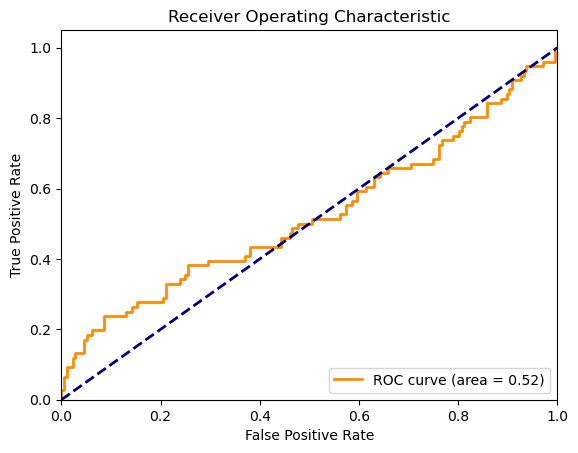

In [433]:
evaluate_model(nvda, "NVDA_tail15", tail15probit_result, tail15_y_test, tail15_X_test)



In [434]:
downsidetail_X = nvda[["GC=F", "DX-Y.NYB", "^GSPC", "^TNX", "^VIX", "MON", "JAN", "FEB", "MAR", "APR", "MAY", "AUG", "NOV"]] 
downsidetail_y = nvda['NVDA_downsidetail']    
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(downsidetail_X, downsidetail_y):
    downsidetail_X_train, downsidetail_X_test = downsidetail_X.iloc[train_index], downsidetail_X.iloc[test_index]
    downsidetail_y_train, downsidetail_y_test = downsidetail_y.iloc[train_index], downsidetail_y.iloc[test_index]

In [435]:
downsidetaillogit_model = Logit(endog=downsidetail_y_train, exog=downsidetail_X_train)
downsidetaillogit_result = downsidetaillogit_model.fit()
downsidetaillogit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.358160
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:      NVDA_downsidetail
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           1.3161      1.398      0.941      0.347      -1.424       4.056
DX-Y.NYB       1.2608      3.033      0.416      0.678      -4.684       7.206
^GSPC        -11.4732      1.562     -7.343      0.000     -14.536      -8.411
^TNX           0.5975      0.350      1.707      0.088      -0.088       1.283
^VIX           0.6007      0.210      2.860      0.004       0.189       1.012
MON           -0.2076      0.032     -6.497      0.000      -0.270      -0.145
JAN           -0.2030      0.039     -5.238      0.000      -0.279      -0.127
FEB           -0.2728      0.042     -6.447      0.000      -0.356      -0.190
MAR           -0.3560      0.053     -6.706      0.000      -0.460      -0.252
APR           -0.2658      0.044     -6.019      0.000      -0.352      -0.179
MAY           -0.3441      0.048     -7.152      0.000      -0.438      -0.250
AUG           -0.3220      0.049     -6.625      0.000      -0.417      -0.227
NOV           -0.3145      0.056     -5.582      0.000      -0.425      -0.204
==============================================================================
"""

Confusion Matrix:
[[102 125]
 [  1  24]]

ROC AUC score: 0.8366519823788546

Accuracy Score: 0.5
Precision: 0.1610738255033557
Recall: 0.96
F1 Score: 0.27586206896551724


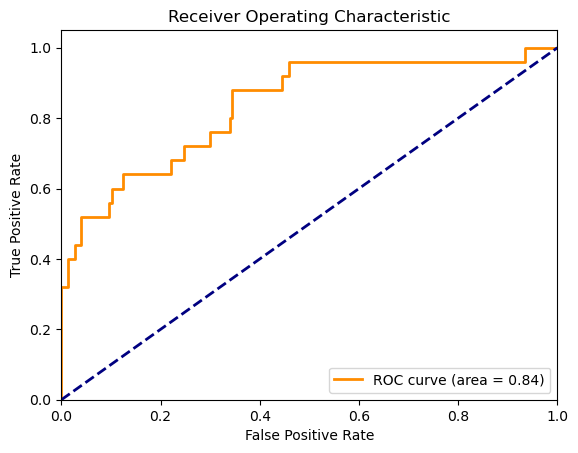

In [437]:
evaluate_model(nvda, "NVDA_downsidetail", downsidetaillogit_result, downsidetail_y_test, downsidetail_X_test)


In [436]:
downsidetailprobit_model = Probit(endog=downsidetail_y_train, exog=downsidetail_X_train)
downsidetailprobit_result = downsidetailprobit_model.fit()
downsidetailprobit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.357629
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:      NVDA_downsidetail
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           1.2963      1.383      0.937      0.349      -1.415       4.007
DX-Y.NYB       1.1512      3.080      0.374      0.709      -4.886       7.189
^GSPC        -11.7285      1.533     -7.650      0.000     -14.733      -8.724
^TNX           0.5895      0.353      1.670      0.095      -0.102       1.281
^VIX           0.5669      0.208      2.732      0.006       0.160       0.974
MON           -0.1976      0.031     -6.380      0.000      -0.258      -0.137
JAN           -0.2097      0.038     -5.526      0.000      -0.284      -0.135
FEB           -0.2774      0.040     -6.860      0.000      -0.357      -0.198
MAR           -0.3534      0.050     -7.034      0.000      -0.452      -0.255
APR           -0.2721      0.042     -6.494      0.000      -0.354      -0.190
MAY           -0.3451      0.045     -7.750      0.000      -0.432      -0.258
AUG           -0.3114      0.043     -7.194      0.000      -0.396      -0.227
NOV           -0.3203      0.051     -6.247      0.000      -0.421      -0.220
==============================================================================
"""

Confusion Matrix:
[[ 99 128]
 [  1  24]]

ROC AUC score: 0.8380616740088106

Accuracy Score: 0.4880952380952381
Precision: 0.15789473684210525
Recall: 0.96
F1 Score: 0.27118644067796605


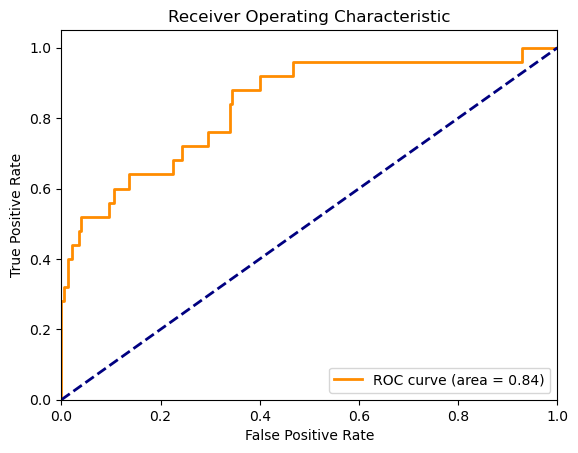

In [438]:
evaluate_model(nvda, "NVDA_downsidetail", downsidetailprobit_result, downsidetail_y_test, downsidetail_X_test)



In [439]:
downsidetail_y_test.value_counts()

NVDA_downsidetail
0    227
1     25
Name: count, dtype: int64